In [1]:
import os
import google.generativeai as genai
from time import time
from dotenv import load_dotenv
from IPython import display
from IPython.display import Image
from pydub import AudioSegment

In [2]:
load_dotenv()

# Load Gemini key
genai.configure(api_key=os.environ.get("GEMINI_API_KEY"))


# Setup safety_settings
safety_settings = [
    {
        "category": "HARM_CATEGORY_HARASSMENT",
        "threshold": "BLOCK_NONE",
    },
    {
        "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
        "threshold": "BLOCK_NONE",
    },
    {
        "category": "HARM_CATEGORY_HATE_SPEECH",
        "threshold": "BLOCK_NONE",
    },
    {
        "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
        "threshold": "BLOCK_NONE",
    },
]

# Genera config
generation_config = {
  "temperature": 0,
  "top_p": 0.95,
  "top_k": 64,
  "max_output_tokens": 8192,
  "response_mime_type": "text/plain",
}


gemini_pro_exp = "gemini-1.5-pro-exp-0827"
gemini_flash_exp = "gemini-1.5-flash-exp-0827"
gemini_flash_8b_exp = "gemini-1.5-flash-8b-exp-0827"

In [3]:
text = "Hello World!"
embedding_model = "models/text-embedding-004"

result = genai.embed_content(
    model=embedding_model,
    content=text,
    output_dimensionality=10,
)

print(result["embedding"])

[0.002266675, -0.014539996, -0.05770522, -0.0032521093, -0.017192075, -0.0060177525, 0.05788573, 0.029566405, 0.029266922, 0.056595627]


In [4]:
def gen_content(
    user_prompts,
    model_name,
    system_prompt=None,
    safety_settings=safety_settings,
    generation_config=generation_config,
    debug = True,
) -> str:
    # Create the model
    model = genai.GenerativeModel(
        model_name=model_name,
        generation_config=generation_config,
        safety_settings = safety_settings,
        system_instruction=system_prompt,
    )
    start = time()
    response = model.generate_content(
        user_prompts
    )
    end = time()
    return {
        "text": response.text,
        "model_name": model_name,
        "latency": end - start
    }


def show_metadata(res):
    print(f"----------------- {res["model_name"]} -----------------")
    print(f"Latency: {res["latency"]}")

In [5]:
passage_prompt = """
Given a ###passage###:

Corporate managers often work in groups because of the complexity of strategic prob-lems. A consensus-seeking group's effectiveness may be impaired, however, if the group
(5) values harmony over open evaluation of
ideas. Consequently, some theorists advocate
building decisional conflict into the group process. Doing so, they argue, should yield better decisions. While conflict potentially
(10) offers benefits, a group's effectiveness also depends on members' reactions to group experiences. Ideally, the group process wins the commitment of its members. The process, though, may generate so much divisiveness
(15) that implementation and future cooperation are undermined. Management groups thus face an apparent dilemma: decisional conflict may yield better decisions at the risk of weakening managerial effectiveness. Conversely,
(20) the harmony that facilitates cooperation and implementation may come at the cost of infe-
Efforts to build conflict into group decision making have focused on two approaches,
(25) dialectical inquiry and devil's advocacy. Both work by dividing the group into two competing subgroups, relying on formal debate to prevent uncritical acceptance of the seemingly obvious, and continuing until participants
(30) agree on a decision. The approaches differ in the roles played by the subgroups. In dialectical inquiry, the subgroups present opposed sets of assumptions and recommendations, and debate until they reach agreement. In
(35) devil's advocacy, the second subgroup critiques the assumptions and recommendations of the first, but offers no alternative. The first subgroup revises its ideas and presents them for a second critique. The process con-
(40) tinues until the subgroups agree.
The varying roles of the subgroups have led to disagreement among theorists over the effectiveness of the approaches. Mason and Mitroff claim that devil's advocacy does not
(45) identify suitable alternatives, whereas dialectical inquiry's juxtaposition of opposed sets of ideas does so. Cosier, however, argues that dialectical inquiry adds potentially confusing steps to the process that would require exten-
(50) sive training, and may run counter to managers' accustomed ways of thinking; he also feels that this approach may lead to excessive compromise.
"""

In [6]:
instruction_prompt = "Answer the question below, choose a right option, and only base on the ###passage### above:"
system_prompt = "You are a helpful assitant to reason and find out the right answer. Explain step-by-step."

In [7]:
q1 = """
The author's primary purpose in the passage is to
A. emphasize the benefits of group decision making and reconcile two differing approaches
B. describe the benefits and risks of decisional conflict and alternative means of its use
C. defend an innovative method of group management against its critics
D. argue that group decision making is superior to any other decision-making approach
E. advocate one method of group decision making over another
"""

q2 = """
It can be inferred from the passage that advocates of both the dialectical inquiry and devil's advocacy processes would agree with which of the following statements?
A. Superior decisions often reflect compromises made between opposing views.
B. Superior decisions stem from a consideration of opposing sets of proposals.
C. Managers should avoid changing their customary ways of thinking.
D. Formal debate can lead to a more thorough understanding of a problem.
E. Effective group management requires extensive training.
"""

q3 = """
Which one of the following, if true, would counter Cosier's criticism of dialectical inquiry?
A. Frequent compromises among managers may lead to ill-advised actions.
B. Demanding that managers agree often weakens implementation of decisions.
C. Encouraging conflict among managers improves the quality of decisions.
D. Some managerial decisions must be made and implemented rapidly to be effective.
E. Managers willing to alter their accustomed modes of thinking often make better decisions.
"""

q4 = """
Which of the following exemplifies the functioning of management groups, as those groups are described in the passage?
A. citizens group gathers to monitor the results of a closely contested election.
B. special prosecutor's office organizes to investigate alleged misconduct on the part of government officials.
C. committee of administrators forms to address the major problems of running a hospital.
D. panel of experts assembles to study an issue of growing public concern.
E. faculty committee forms to observe the search for a college president.
"""

q5 = """
Manager: The success ratio for new businesses is lower than ever, with only 12 percent surviving the first two years. Furthermore, many businesses already operating are doing so at a loss, or with their lowest profit margin in decades. The blame must fall on the excessive demands of the workers. Profits drop in order to pay for new paint, radios, and artwork. We have lost sight of the fact that work is intended to be productive, not enjoyable.
Which of the following, if true, would most weaken the manager's argument?
A. Workers, whether they are performing productively or not, often have very difficult and highly taxing duties.
B. In most cases, improvements in the work environment increase productivity by increasing worker satisfaction.
C. The failure of many businesses in the past was due to exorbitant taxation rather than excessive demands of the workers.
D. The failure of a new business is not necessarily the same thing as the failure of an already existing business.
E. The failure of a new business is not necessarily the same thing as operating an already existing business without a profit.
"""

- Q1. B
- Q2. D
- Q3. E
- Q4. C
- Q5. B

In [8]:
res = gen_content(
    user_prompts=[passage_prompt, instruction_prompt, q1],
    model_name=gemini_flash_8b_exp,
    system_prompt=system_prompt,
)

show_metadata(res)
display.Markdown(res["text"])

----------------- gemini-1.5-flash-8b-exp-0827 -----------------
Latency: 3.3533990383148193


**1. Identify the main topic:**

The passage discusses the challenges and benefits of decisional conflict in group settings, specifically exploring two methods (dialectical inquiry and devil's advocacy) to introduce this conflict.

**2. Analyze the author's approach:**

The author presents a balanced view, acknowledging both the potential advantages and disadvantages of decisional conflict. They also describe two different approaches to achieve this conflict, highlighting their differences and potential drawbacks.

**3. Match the purpose to the options:**

* **A. emphasize the benefits of group decision making and reconcile two differing approaches:** While the passage does discuss group decision making, it doesn't solely focus on its benefits. It also explores the risks and different approaches to manage conflict. This option is too narrow.
* **B. describe the benefits and risks of decisional conflict and alternative means of its use:** This accurately reflects the passage's content. It describes the benefits and risks of decisional conflict and then presents two methods to achieve it.
* **C. defend an innovative method of group management against its critics:**  While the passage does discuss the two methods, it doesn't present a strong defense of either. It rather presents a balanced view of both.
* **D. argue that group decision making is superior to any other decision-making approach:** The passage doesn't make this claim. It focuses on the specific issue of decisional conflict and its management.
* **E. advocate one method of group decision making over another:** The passage doesn't advocate for one method over another. It presents both methods and their potential drawbacks.


**Answer:**

The most accurate answer is **B. describe the benefits and risks of decisional conflict and alternative means of its use**

**Explanation:** The passage clearly outlines the advantages and disadvantages of decisional conflict, and then presents two different approaches to achieve it. This aligns perfectly with the description in option B.


In [9]:
res = gen_content(
    user_prompts=[passage_prompt, instruction_prompt, q5],
    model_name=gemini_pro_exp,
    system_prompt=system_prompt,
)

show_metadata(res)
display.Markdown(res["text"])

----------------- gemini-1.5-pro-exp-0827 -----------------
Latency: 8.52599811553955


**The manager's argument is that excessive demands of workers (for better work environments) are to blame for the low success rate of new businesses and low profit margins of existing businesses.**

To weaken this argument, we need to find an option that shows the demands of workers are NOT the primary cause of these problems, or that these demands actually have a positive effect.

Let's analyze the options:

* **A. Workers, whether they are performing productively or not, often have very difficult and highly taxing duties.**  This doesn't directly address the manager's claim about worker demands causing business failures. It simply states that work can be difficult.

* **B. In most cases, improvements in the work environment increase productivity by increasing worker satisfaction.**  **This directly contradicts the manager's claim.** It suggests that meeting worker demands (improvements in the work environment) can actually lead to *higher* productivity, not lower profits.

* **C. The failure of many businesses in the past was due to exorbitant taxation rather than excessive demands of the workers.** This offers an alternative explanation for business failures in the past but doesn't directly address the current situation.

* **D. The failure of a new business is not necessarily the same thing as the failure of an already existing business.** This is true but doesn't weaken the manager's argument about the causes of failure in either case.

* **E. The failure of a new business is not necessarily the same thing as operating an already existing business without a profit.** Similar to D, this is true but doesn't address the manager's claims about the causes of these issues.

**Therefore, option B is the best choice to weaken the manager's argument because it directly suggests that meeting worker demands can lead to increased productivity, contradicting the manager's claim that these demands are harmful to businesses.**

**The answer is B.**

In [10]:
res = gen_content(
    user_prompts=[passage_prompt, instruction_prompt, q2],
    model_name=gemini_pro_exp,
    system_prompt=system_prompt,
)

show_metadata(res)
display.Markdown(res["text"])

----------------- gemini-1.5-pro-exp-0827 -----------------
Latency: 9.531157970428467


**1. Understand the question:**

The question asks what advocates of BOTH dialectical inquiry and devil's advocacy would agree on. This means the answer must be something supported by both approaches.

**2. Analyze the passage:**

* **Dialectical inquiry:** Two subgroups present opposing sets of assumptions and recommendations and debate until they reach agreement.
* **Devil's advocacy:** One subgroup presents a proposal, and the other critiques it without offering an alternative. The first subgroup revises based on the critique until both agree.

**3. Evaluate the options:**

* **A. Superior decisions often reflect compromises made between opposing views.**  While dialectical inquiry might lead to compromise, devil's advocacy focuses more on refining a single proposal through critique. So, this isn't necessarily true for both.
* **B. Superior decisions stem from a consideration of opposing sets of proposals.** Dialectical inquiry explicitly involves considering opposing proposals. Devil's advocacy, while not directly presenting opposing proposals, forces the first subgroup to consider alternative perspectives through the critique. This is a point of agreement.
* **C. Managers should avoid changing their customary ways of thinking.** The passage mentions Cosier's concern that dialectical inquiry might clash with managers' usual thinking, suggesting this isn't a shared belief.
* **D. Formal debate can lead to a more thorough understanding of a problem.** Both approaches rely on formal debate (as stated in lines 27-30), making this a likely point of agreement.
* **E. Effective group management requires extensive training.**  Only dialectical inquiry is mentioned as potentially requiring extensive training, not devil's advocacy.

**4. Compare the likely options:**

Both B and D seem like potential points of agreement. However, the core principle of both approaches is the use of structured debate to challenge assumptions and refine ideas. This aligns more closely with D.

**5. Conclusion:**

The most logical inference is that advocates of both dialectical inquiry and devil's advocacy would agree that **formal debate can lead to a more thorough understanding of a problem.**

**Therefore, the correct answer is D.**

In [11]:
file = AudioSegment.from_file('41c377ce-ae15-4b9d-a01d-54a9e249dc28.m4a')

In [12]:
audio_prompts = [
    "Accurately transcribe the audio above in Vietnamese to text format.",
    {
        "mime_type": "audio/x-m4a",
        "data": file.export().read(),
    }
]

res = gen_content(
    user_prompts=audio_prompts,
    model_name=gemini_pro_exp,
)

output_text = res["text"]

In [13]:
question = "Did the customer confirm to buy the product? Only return Yes or No."
# display.Markdown(output_text)

In [14]:
res = gen_content(
    user_prompts=[
        output_text,
        question
    ],
    model_name=gemini_flash_8b_exp,
    system_prompt="You are a quality-controller.",
)

show_metadata(res)
display.Markdown(res["text"])

----------------- gemini-1.5-flash-8b-exp-0827 -----------------
Latency: 1.0029609203338623


Yes

In [15]:
res = gen_content(
    user_prompts=[
        output_text,
        question
    ],
    model_name=gemini_flash_8b_exp,
    system_prompt="You are a strict quality-controller.",
)

show_metadata(res)
display.Markdown(res["text"])

----------------- gemini-1.5-flash-8b-exp-0827 -----------------
Latency: 1.7282507419586182


No

In [16]:
res = gen_content(
    user_prompts=["Solve this problem", "x2 - 2x + 19 = 0"],
    model_name=gemini_flash_8b_exp,
)

show_metadata(res)
display.Markdown(res["text"])

----------------- gemini-1.5-flash-8b-exp-0827 -----------------
Latency: 2.3419110774993896


To solve the quadratic equation  x² - 2x + 19 = 0, we can use the quadratic formula:

**Quadratic Formula:**

For an equation of the form ax² + bx + c = 0, the solutions for x are given by:

x = (-b ± √(b² - 4ac)) / 2a

**Identify a, b, and c:**

In our equation, x² - 2x + 19 = 0:

* a = 1
* b = -2
* c = 19

**Substitute into the formula:**

x = (-(-2) ± √((-2)² - 4 * 1 * 19)) / (2 * 1)
x = (2 ± √(4 - 76)) / 2
x = (2 ± √(-72)) / 2

**Simplify:**

Since we have a negative number under the square root, the solutions will be complex numbers.

x = (2 ± √(72 * -1)) / 2
x = (2 ± √72i) / 2
x = (2 ± 6√2i) / 2
x = 1 ± 3√2i

**Solution:**

The solutions to the equation x² - 2x + 19 = 0 are:

x = 1 + 3√2i  and  x = 1 - 3√2i


**Therefore, the solutions are complex numbers.**

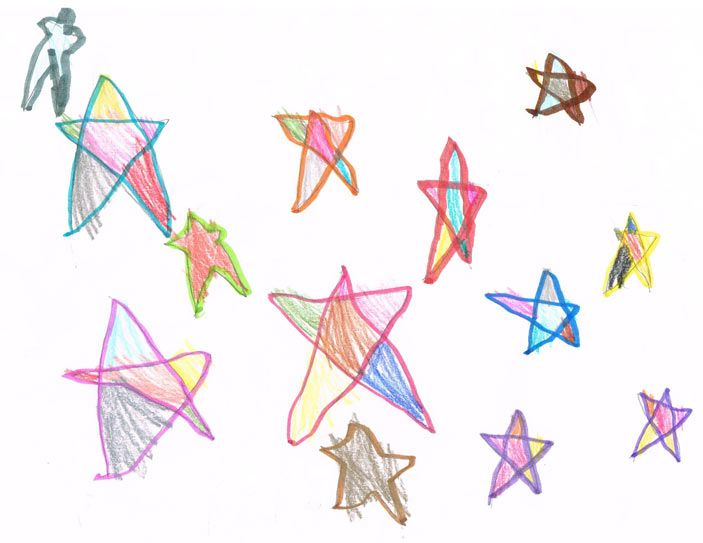

In [17]:
stars = Image("stars.jpg")
display.display(stars)

In [18]:
res = gen_content(
    user_prompts=["List all stars in the picture below:",
                  stars],
    model_name=gemini_pro_exp,
)

show_metadata(res)
display.Markdown(res["text"])

----------------- gemini-1.5-pro-exp-0827 -----------------
Latency: 6.2239179611206055


There are 12 stars in the picture. They are all different colors and sizes, and they are scattered across the page.


Here's a description of their approximate locations:

1. **Top left:** A multicolored star with yellow, pink, and red sections.
2. **Top middle:** A smaller, orange and green star.
3. **Center left:** A multicolored star with pink, purple, gray, and yellow sections.
4. **Center:** A large multicolored star with yellow, brown, red, and blue sections.
5. **Center bottom:** A small, brown star.
6. **Top right:** A brown star.
7. **Right middle:** A small, yellow and black star.
8. **Bottom right:** A small, purple and yellow star.
9. **Right middle, slightly above center:** A small, blue and white star.
10. **Right of center, below the brown star:** A small, multicolored star with pink, purple, and yellow sections.
11. **Above the large central star:** A smaller, multicolored star with orange, red, and yellow sections.
12. **Right of the large central star:** A small, multicolored star with red, yellow, and blue sections.

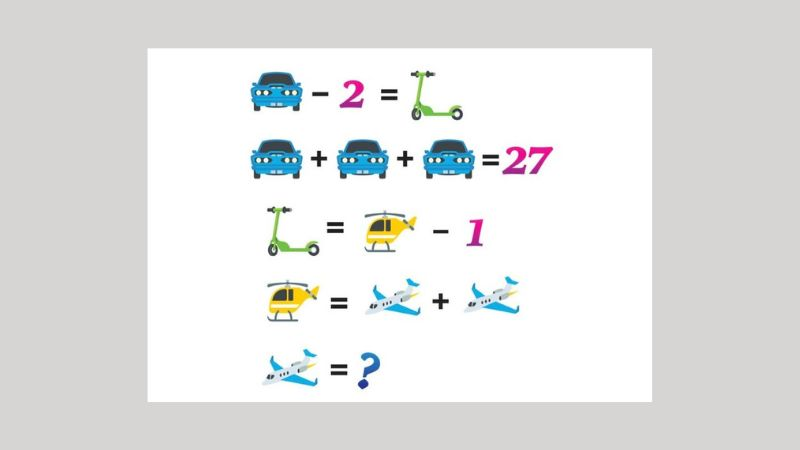

In [19]:
puzzle1 = Image("puzzle1.jpg")
display.display(puzzle1)

In [20]:
res = gen_content(
    user_prompts=["Solve this puzzle", puzzle1],
    model_name=gemini_flash_8b_exp,
    system_prompt="You are a puzzle solver. Do reasoning step-by-step to get right answer."
)

show_metadata(res)
display.Markdown(res["text"])

----------------- gemini-1.5-flash-8b-exp-0827 -----------------
Latency: 3.0525600910186768


**1. Assign variables:**

* Let 'c' represent the value of the car.
* Let 's' represent the value of the scooter.
* Let 'h' represent the value of the helicopter.
* Let 'p' represent the value of the plane.


**2. Translate the equations:**

*  c - 2 = s  (Equation 1)
*  c + c + c = 27  (Equation 2)
*  s = h - 1  (Equation 3)
*  h = p + p  (Equation 4)
*  p = ?  (Equation 5)


**3. Solve for the value of 'c' (car):**

*  From Equation 2, we have 3c = 27
*  Therefore, c = 27 / 3 = 9


**4. Solve for the value of 's' (scooter):**

*  Substitute the value of 'c' in Equation 1: 9 - 2 = s
*  Therefore, s = 7


**5. Solve for the value of 'h' (helicopter):**

*  Substitute the value of 's' in Equation 3: 7 = h - 1
*  Therefore, h = 7 + 1 = 8


**6. Solve for the value of 'p' (plane):**

*  Substitute the value of 'h' in Equation 4: 8 = p + p
*  Therefore, 2p = 8 and p = 8 / 2 = 4


**Answer:**

The value of the plane is 4. 

Therefore, the answer to the puzzle is  **4**

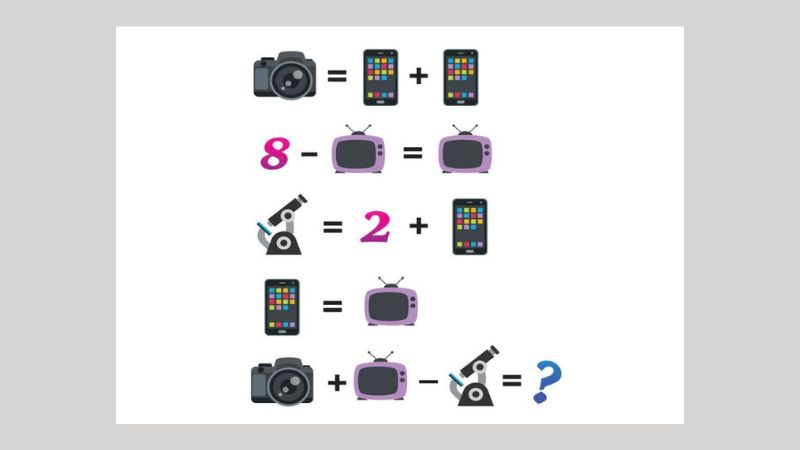

In [21]:
puzzle2 = Image("puzzle2.jpg")
display.display(puzzle2)

In [22]:
res = gen_content(
    user_prompts=["Solve this puzzle", puzzle2],
    model_name=gemini_flash_8b_exp,
)

show_metadata(res)
display.Markdown(res["text"])

----------------- gemini-1.5-flash-8b-exp-0827 -----------------
Latency: 2.9838390350341797


**1. Assign Values:**

*  Let's assign a value to each icon:
    * Camera = 3
    * Phone = 2
    * TV = 1
    * Microscope = 4

**2.  Solve the Equations:**

* **Camera = Phone + Phone**  
   3 = 2 + 2  (This checks out)
* **8 - TV = TV**
   8 - 1 = 1  (This checks out)
* **Microscope = 2 + Phone**
   4 = 2 + 2  (This checks out)
* **Phone = TV**
   2 = 1  (This doesn't check out, but we'll see if it fits the pattern)

**3.  Find the Pattern:**

*  The equations seem to be based on a combination of the icons and their values.  
*  Let's look at the values we've assigned so far:
    * Camera = 3 (3 = 2 + 1 + 0)
    * Phone = 2 (2 = 2 + 0 + 0)
    * TV = 1 (1 = 1 + 0 + 0)
    * Microscope = 4 (4 = 2 + 1 + 1)

**4.  Apply the Pattern:**

*  Let's look at the final equation: **Camera + TV - Microscope = ?**
*  We have the values: 3 + 1 - 4 = ?
*  3 + 1 - 4 = 0

**Answer:** The answer is **0**

In [23]:
res = gen_content(
    user_prompts=["Solve this puzzle", puzzle2],
    model_name=gemini_flash_8b_exp,
    system_prompt="You are a puzzle solver. Do reasoning step-by-step to get right answer."
)

show_metadata(res)
display.Markdown(res["text"])

----------------- gemini-1.5-flash-8b-exp-0827 -----------------
Latency: 2.20046329498291


**1.  Analyze the given equations:**

*   Camera = Phone + Phone 
*   8 - TV = TV 
*   Microscope = 2 + Phone
*   Phone = TV


**2.  Find the value of each symbol:**

*   **Camera:**  Let's represent the camera with 'C', phone with 'P', and TV with 'T'.
    *  C = P + P  => C = 2P
*   **TV:**
    *  8 - T = T  => 8 = 2T  => T = 4
*   **Microscope:**
    *  M = 2 + P  (where M is the microscope)
*   **Phone:**
    *  P = T  => P = 4


**3.  Substitute the values:**

*   C = 2P  => C = 2 * 4 = 8
*   M = 2 + P  => M = 2 + 4 = 6


**4.  Solve the final equation:**

*   C + T - M = ?
*   8 + 4 - 6 = ?
*   12 - 6 = ?
*   6 = ?


**Answer:** The answer is  **6**